This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4, pad_and_cumsum

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [3]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

In [4]:
# Core of formulas generated from Mathematica using
# pw = PageWidth /. Options[$Output];
# SetOptions[$Output, PageWidth -> Infinity];
# FortranForm[expression /. \[Tau] -> dt]
# SetOptions[$Output, PageWidth -> pw];

def upper_error_bound(n, m, dt, p, q):
    return np.abs(
        - 2*dt*(-103 + 60*m*(1 + m))*p/(135.*(1 + 2*m)**6)
        + dt**3*(17 + 120*m*(1 + m)*(1 + 2*m*(1 + m)))*n*p*q**(-1 + n)/(90.*(1 + 2*m)**4)
        - 2*dt**2*(9 + 20*m*(1 + m)*(5 + 12*m*(1 + m)))*q**n/(45.*(1 + 2*m)**5)
    )

def upper_error_bound_p(n, m, dt, p, q):
    return np.abs(
        4*(141 + 28*m*(1 + m)*(3 + 20*m*(1 + m)))*p/(105.*(1 + 2*m)**7)
        + 2*dt**2*(9 + 20*m*(1 + m)*(5 + 12*m*(1 + m)))*n*p*q**(-1 + n)/(45.*(1 + 2*m)**5)
        + 2*dt*(167 + 60*m*(1 + m)*(7 + 24*m*(1 + m)))*q**n/(135.*(1 + 2*m)**6)
        + dt**3*q**(-2 + n)*(- (17 + 120*m*(1 + m)*(1 + 2*m*(1 + m)))*(-1 + n)*n*p**2
                             + (1 + 24*m*(-9 + m + 10*m**2*(2 + m)))*n*q**(1 + n))/(180.*(1 + 2*m)**4)
    )

In [9]:
dt = 0.2 # 0.01 # run with 0.2 and 0.01

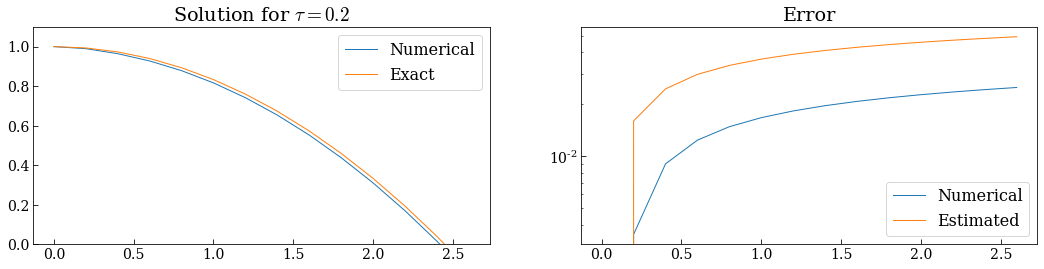

In [10]:
n = 0
le = LaneEmden(n)
tf = 2.7
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1-1/6*t**2
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,4))
#plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title(f"Solution for $\\tau={dt}$")
plt.plot(tspan, sol[:,1], linewidth=1, label="Numerical")
plt.plot(tspan, exact(tspan),
         linewidth=1, label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan, abs(sol[:,1]-exact(tspan)), linewidth=1, label="Numerical")
plt.plot(tspan,
         pad_and_cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         linewidth=1, label="Estimated")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


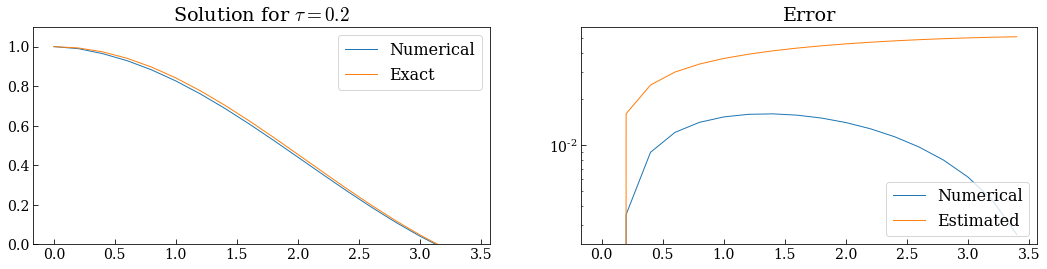

In [11]:
n = 1
le = LaneEmden(n)
tf = 3.5
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: np.sin(t)/t
# Deal with limit t->0 by hand
exact = exact(tspan)
exact[0] = 1.0

errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,4))
#plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title(f"Solution for $\\tau={dt}$")
plt.plot(tspan, sol[:,1], linewidth=1, label="Numerical")
plt.plot(tspan, exact,
         linewidth=1, label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan, abs(sol[:,1]-exact), linewidth=1, label="Numerical")
plt.plot(tspan,
         pad_and_cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         linewidth=1, label="Estimated")
plt.legend()
plt.yscale("log")
plt.legend(loc="lower right")

plt.show()

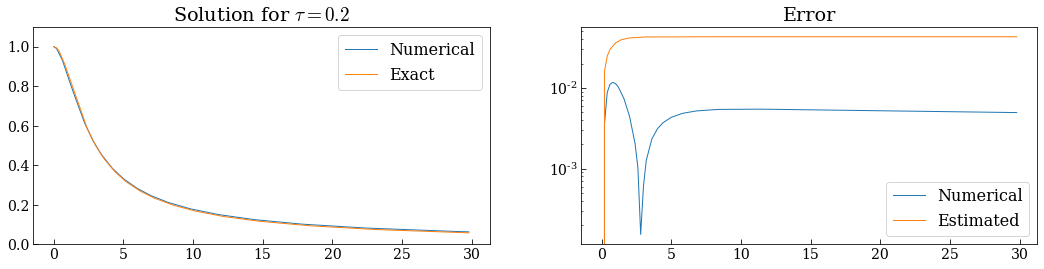

In [12]:
n=5
le = LaneEmden(n)
tf = 30.0
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1/np.sqrt(1 + t**2/3)
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,4))
#plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title(f"Solution for $\\tau={dt}$")
plt.plot(tspan, sol[:,1], linewidth=1, label="Numerical")
plt.plot(tspan, exact(tspan),
         linewidth=1, label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan, abs(sol[:,1]-exact(tspan)), linewidth=1, label="Numerical")
plt.plot(tspan,
         pad_and_cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         linewidth=1, label="Estimated")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()